In [186]:
# Load relevant packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [94]:
# load nodes and edges from file
nodes = pd.read_csv('../data/got-s1-nodes.csv')
edges = pd.read_csv('../data/got-s1-edges.csv')

In [95]:
# initialize networkx graph object and add nodes and edges
G = nx.Graph(name='Game Of Thrones S06')
G.add_nodes_from(nodes['Id'])
edge_dict = [(x['Target'],x['Source'], {'weight' : x['Weight']}) for (_,x) in edges.iterrows()]
label_dict = {x['Id'] : x['Label']  for (_,x) in nodes.iterrows()}
G.add_edges_from(edge_dict)

In [ ]:
for key in label_dict.keys():
    if key != "SANSA":
        label_dict[key]  = ''

In [131]:
nodes

Id          Label
0    ADDAM_MARBRAND          Addam
1             AEGON          Aegon
2             AERYS          Aerys
3    ALLISER_THORNE       Allister
4              ARYA           Arya
5          ASSASSIN       Assassin
6            BAELOR         Baelor
7             BALON          Balon
8         BARRISTAN      Barristan
9            BENJEN         Benjen
10            BERIC          Beric
11           BORCAS         Borcas
12      BOWEN_MARSH          Bowen
13             BRAN           Bran
14    BRANDON_STARK        Brandon
15            BRONN          Bronn
16          CATELYN        Catelyn
17           CERSEI         Cersei
18          COHOLLO        Cohollo
19         DAENERYS       Daenerys
20           DAREON         Dareon
21           DOREAH         Doreah
22            DROGO          Drogo
23   GALBART_GLOVER        Galbart
24            GARED          Gared
25           GENDRY         Gendry
26   GREATJON_UMBER       Greatjon
27            GRENN          Grenn
28      HIGH_SEPTON    High Septon
29            HODOR          Hodor
..              ...            ...
97              ROS            Ros
98            ROYCE          Royce
99     RYGER_RIVERS          Ryger
100             SAM            Sam
101           SANSA          Sansa
102   SEPTA_MORDANE  Septa Mordane
103      SER_VARDIS         Vardis
104            SHAE           Shae
105          SHAGGA         Shagga
106      STABLE_BOY     Stable Boy
107         STANNIS        Stannis
108         STEFFON        Steffon
109    STEVRON_FREY        Stevron
110     SYRIO_FOREL          Syrio
111           THEON          Theon
112      TOBHO_MOTT     Tobho Mott
113          TOMARD         Tomard
114          TOMMEN         Tommen
115          TYRION         Tyrion
116           TYSHA          Tysha
117           TYWIN          Tywin
118     VARDIS_EGEN         Vardis
119           VARLY          Varly
120           VARYS          Varys
121         VISERYS        Viserys
122          WALDER         Walder
123    WAYMAR_ROYCE         Waymar
124            WILL           Will
125   WINE_MERCHANT  Wine Merchant
126           YOREN          Yoren

[127 rows x 2 columns]

In [139]:
sub_nodes = ['SANSA', 'ARYA', 'JON', 'NED', 'ROBERT', 'THEON', 'CERSEI', 'JAIME', 'JOFFREY', 'DROGO', 'DAENERYS']


In [140]:
new_label_dict = {}
for key in label_dict.keys():
    if key in sub_nodes:
        new_label_dict[key] = label_dict[key]

In [141]:
new_label_dict

{'ARYA': 'Arya',
 'CERSEI': 'Cersei',
 'DAENERYS': 'Daenerys',
 'DROGO': 'Drogo',
 'JAIME': 'Jaime',
 'JOFFREY': 'Joffrey',
 'JON': 'Jon',
 'NED': 'Ned',
 'ROBERT': 'Robert',
 'SANSA': 'Sansa',
 'THEON': 'Theon'}

In [142]:
H = G.subgraph(sub_nodes)

{'ARYA': Text(-0.9594929814338684, 0.28173258900642395, 'Arya'),
 'CERSEI': Text(-0.6548606753349304, 0.7557496428489685, 'Cersei'),
 'DAENERYS': Text(-0.1423148214817047, 0.9898214340209961, 'Daenerys'),
 'DROGO': Text(0.8412534594535828, -0.5406408905982971, 'Drogo'),
 'JAIME': Text(0.8412535190582275, 0.5406407713890076, 'Jaime'),
 'JOFFREY': Text(-0.9594929814338684, -0.28173258900642395, 'Joffrey'),
 'JON': Text(-0.6548607349395752, -0.7557495832443237, 'Jon'),
 'NED': Text(1.0, -1.6255812695931127e-08, 'Ned'),
 'ROBERT': Text(0.41541510820388794, -0.9096319675445557, 'Robert'),
 'SANSA': Text(-0.14231500029563904, -0.9898214340209961, 'Sansa'),
 'THEON': Text(0.41541504859924316, 0.9096319675445557, 'Theon')}

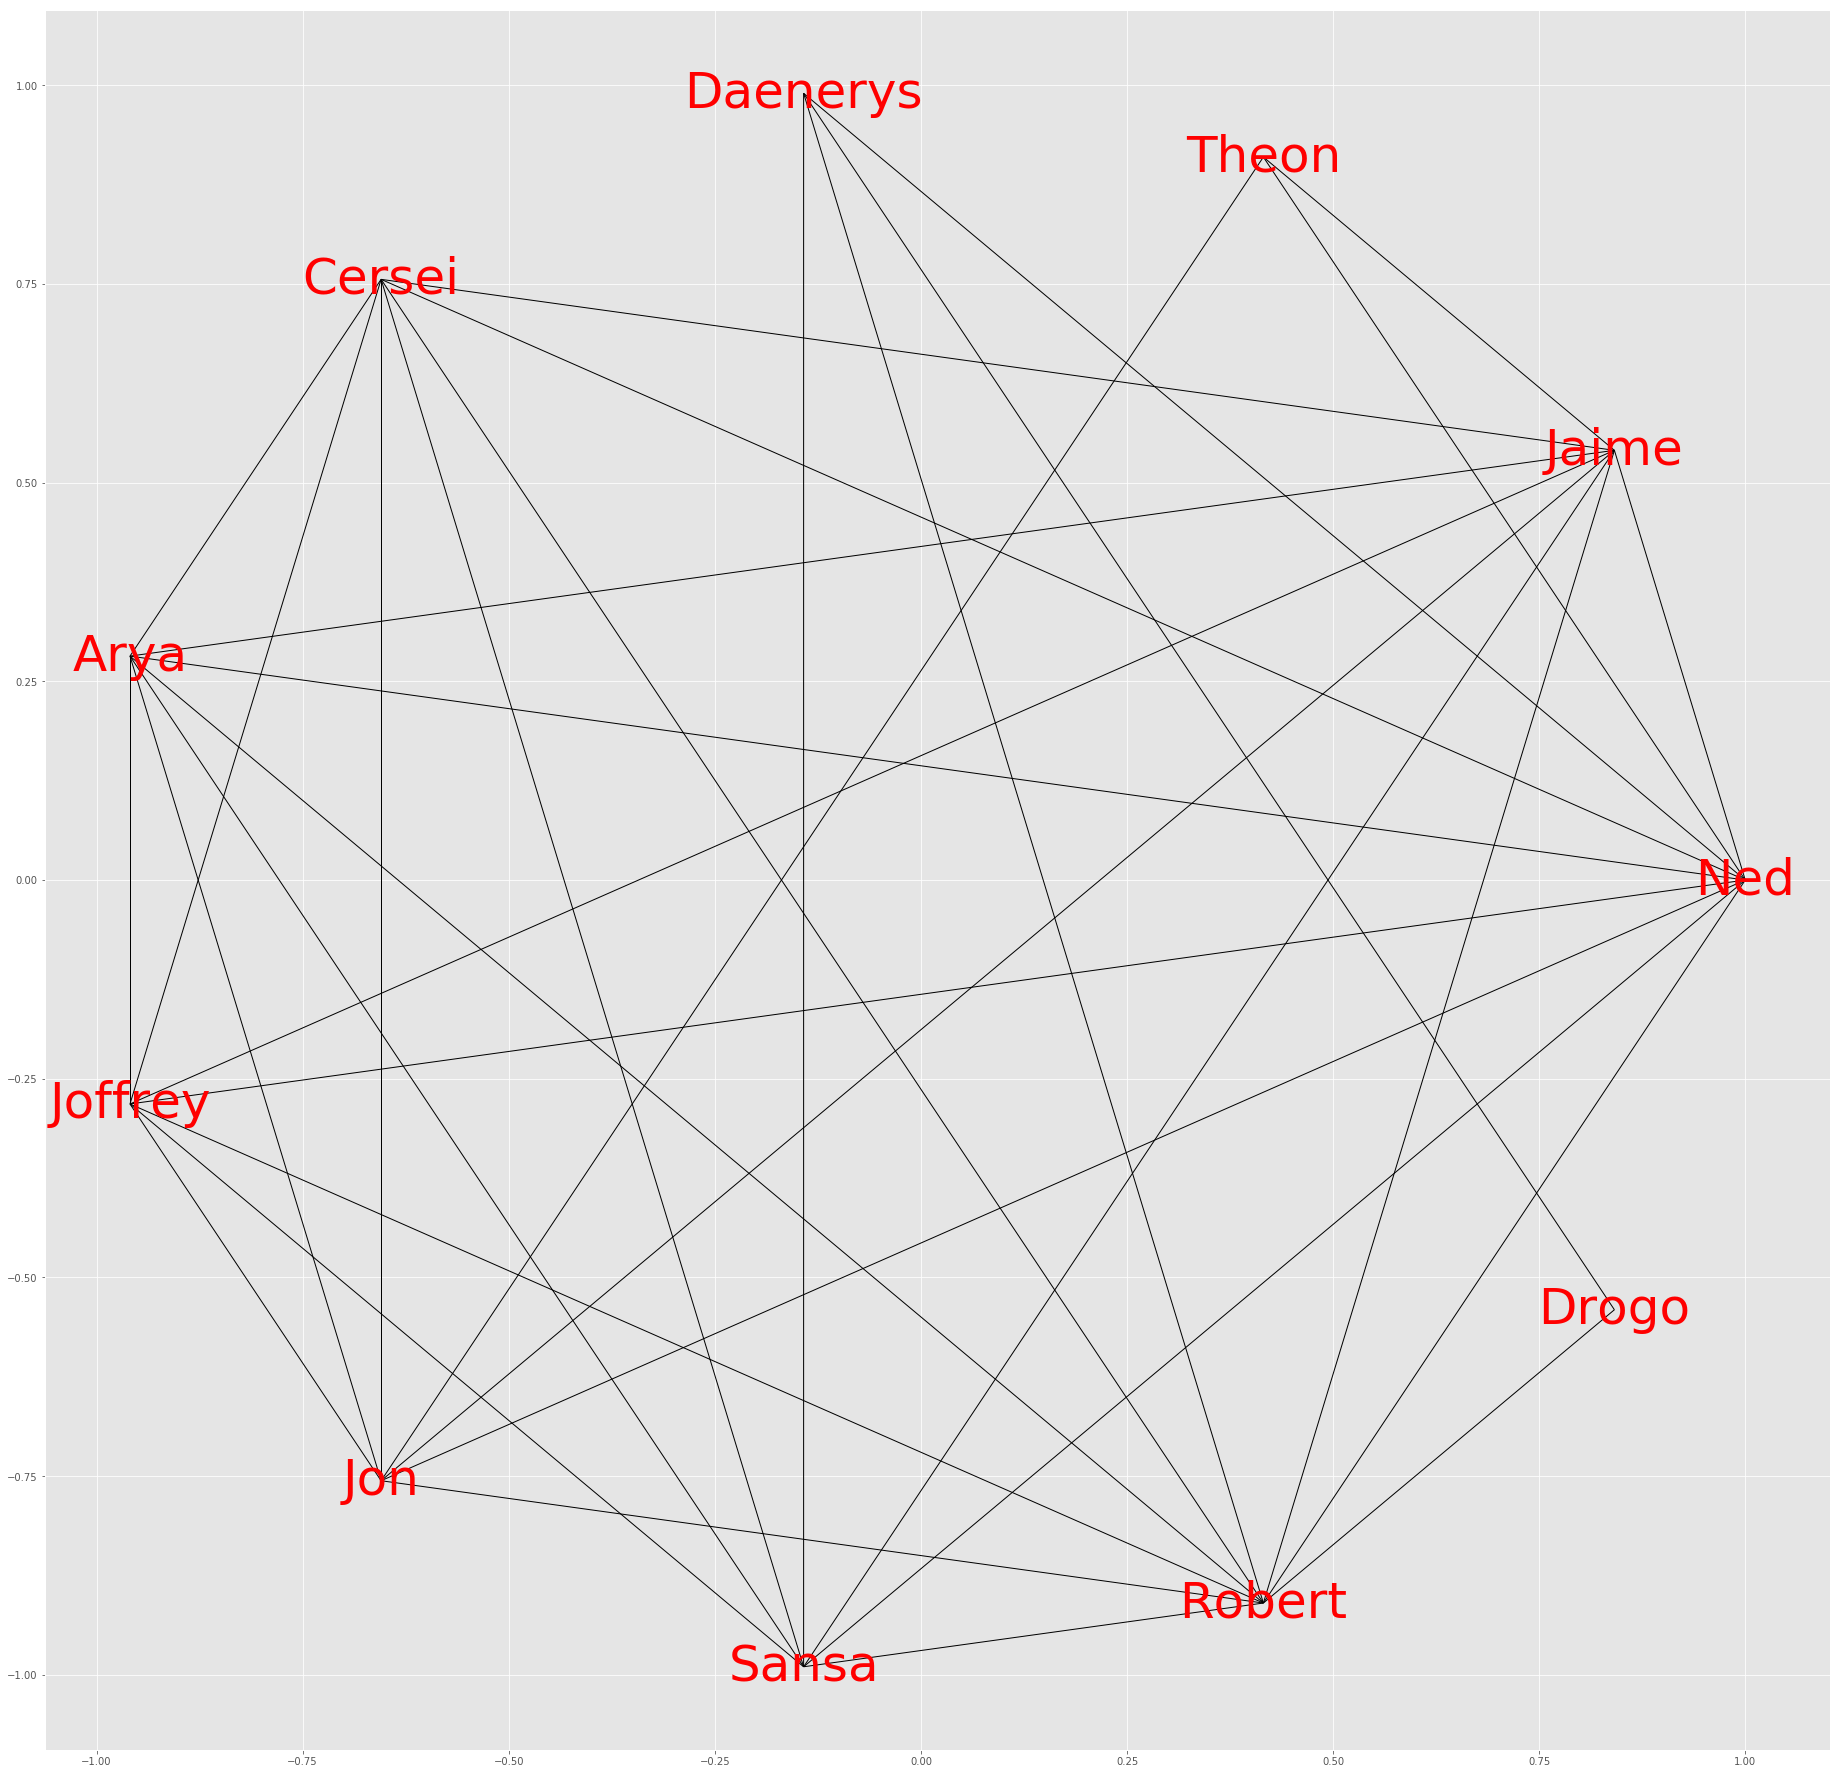

In [152]:
fig = plt.figure(figsize=(32,32))
pos = nx.shell_layout(H)
nx.draw_networkx_nodes(H, pos, alpha = 0)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos, new_label_dict, font_size=50, font_color = "red")

{'ADDAM_MARBRAND': Text(-0.5705815938078778, -0.3883320733925815, 'Addam'),
 'AEGON': Text(0.1857817478986558, 0.5309440974294608, 'Aegon'),
 'AERYS': Text(0.1721872095944269, 0.041059313147523, 'Aerys'),
 'ALLISER_THORNE': Text(-0.19266103211584745, 0.3315057576882458, 'Allister'),
 'ARYA': Text(-0.040766144027596984, -0.16438347482896964, 'Arya'),
 'ASSASSIN': Text(-0.3809126802866825, 0.18048558431065317, 'Assassin'),
 'BAELOR': Text(-0.08118318903110737, -0.3095714114894589, 'Baelor'),
 'BALON': Text(-0.47618505860836857, -0.17653175705386212, 'Balon'),
 'BARRISTAN': Text(0.11746921147739205, -0.10407840555933309, 'Barristan'),
 'BENJEN': Text(-0.10757907585438449, 0.058050680836779264, 'Benjen'),
 'BERIC': Text(0.34660051039275813, -0.38396506603008773, 'Beric'),
 'BORCAS': Text(-0.40123199653918873, 0.7676690963859294, 'Borcas'),
 'BOWEN_MARSH': Text(-0.4692461170031256, 0.7207290359257866, 'Bowen'),
 'BRAN': Text(-0.031709960004793196, 0.05757571286544557, 'Bran'),
 'BRANDON_STA

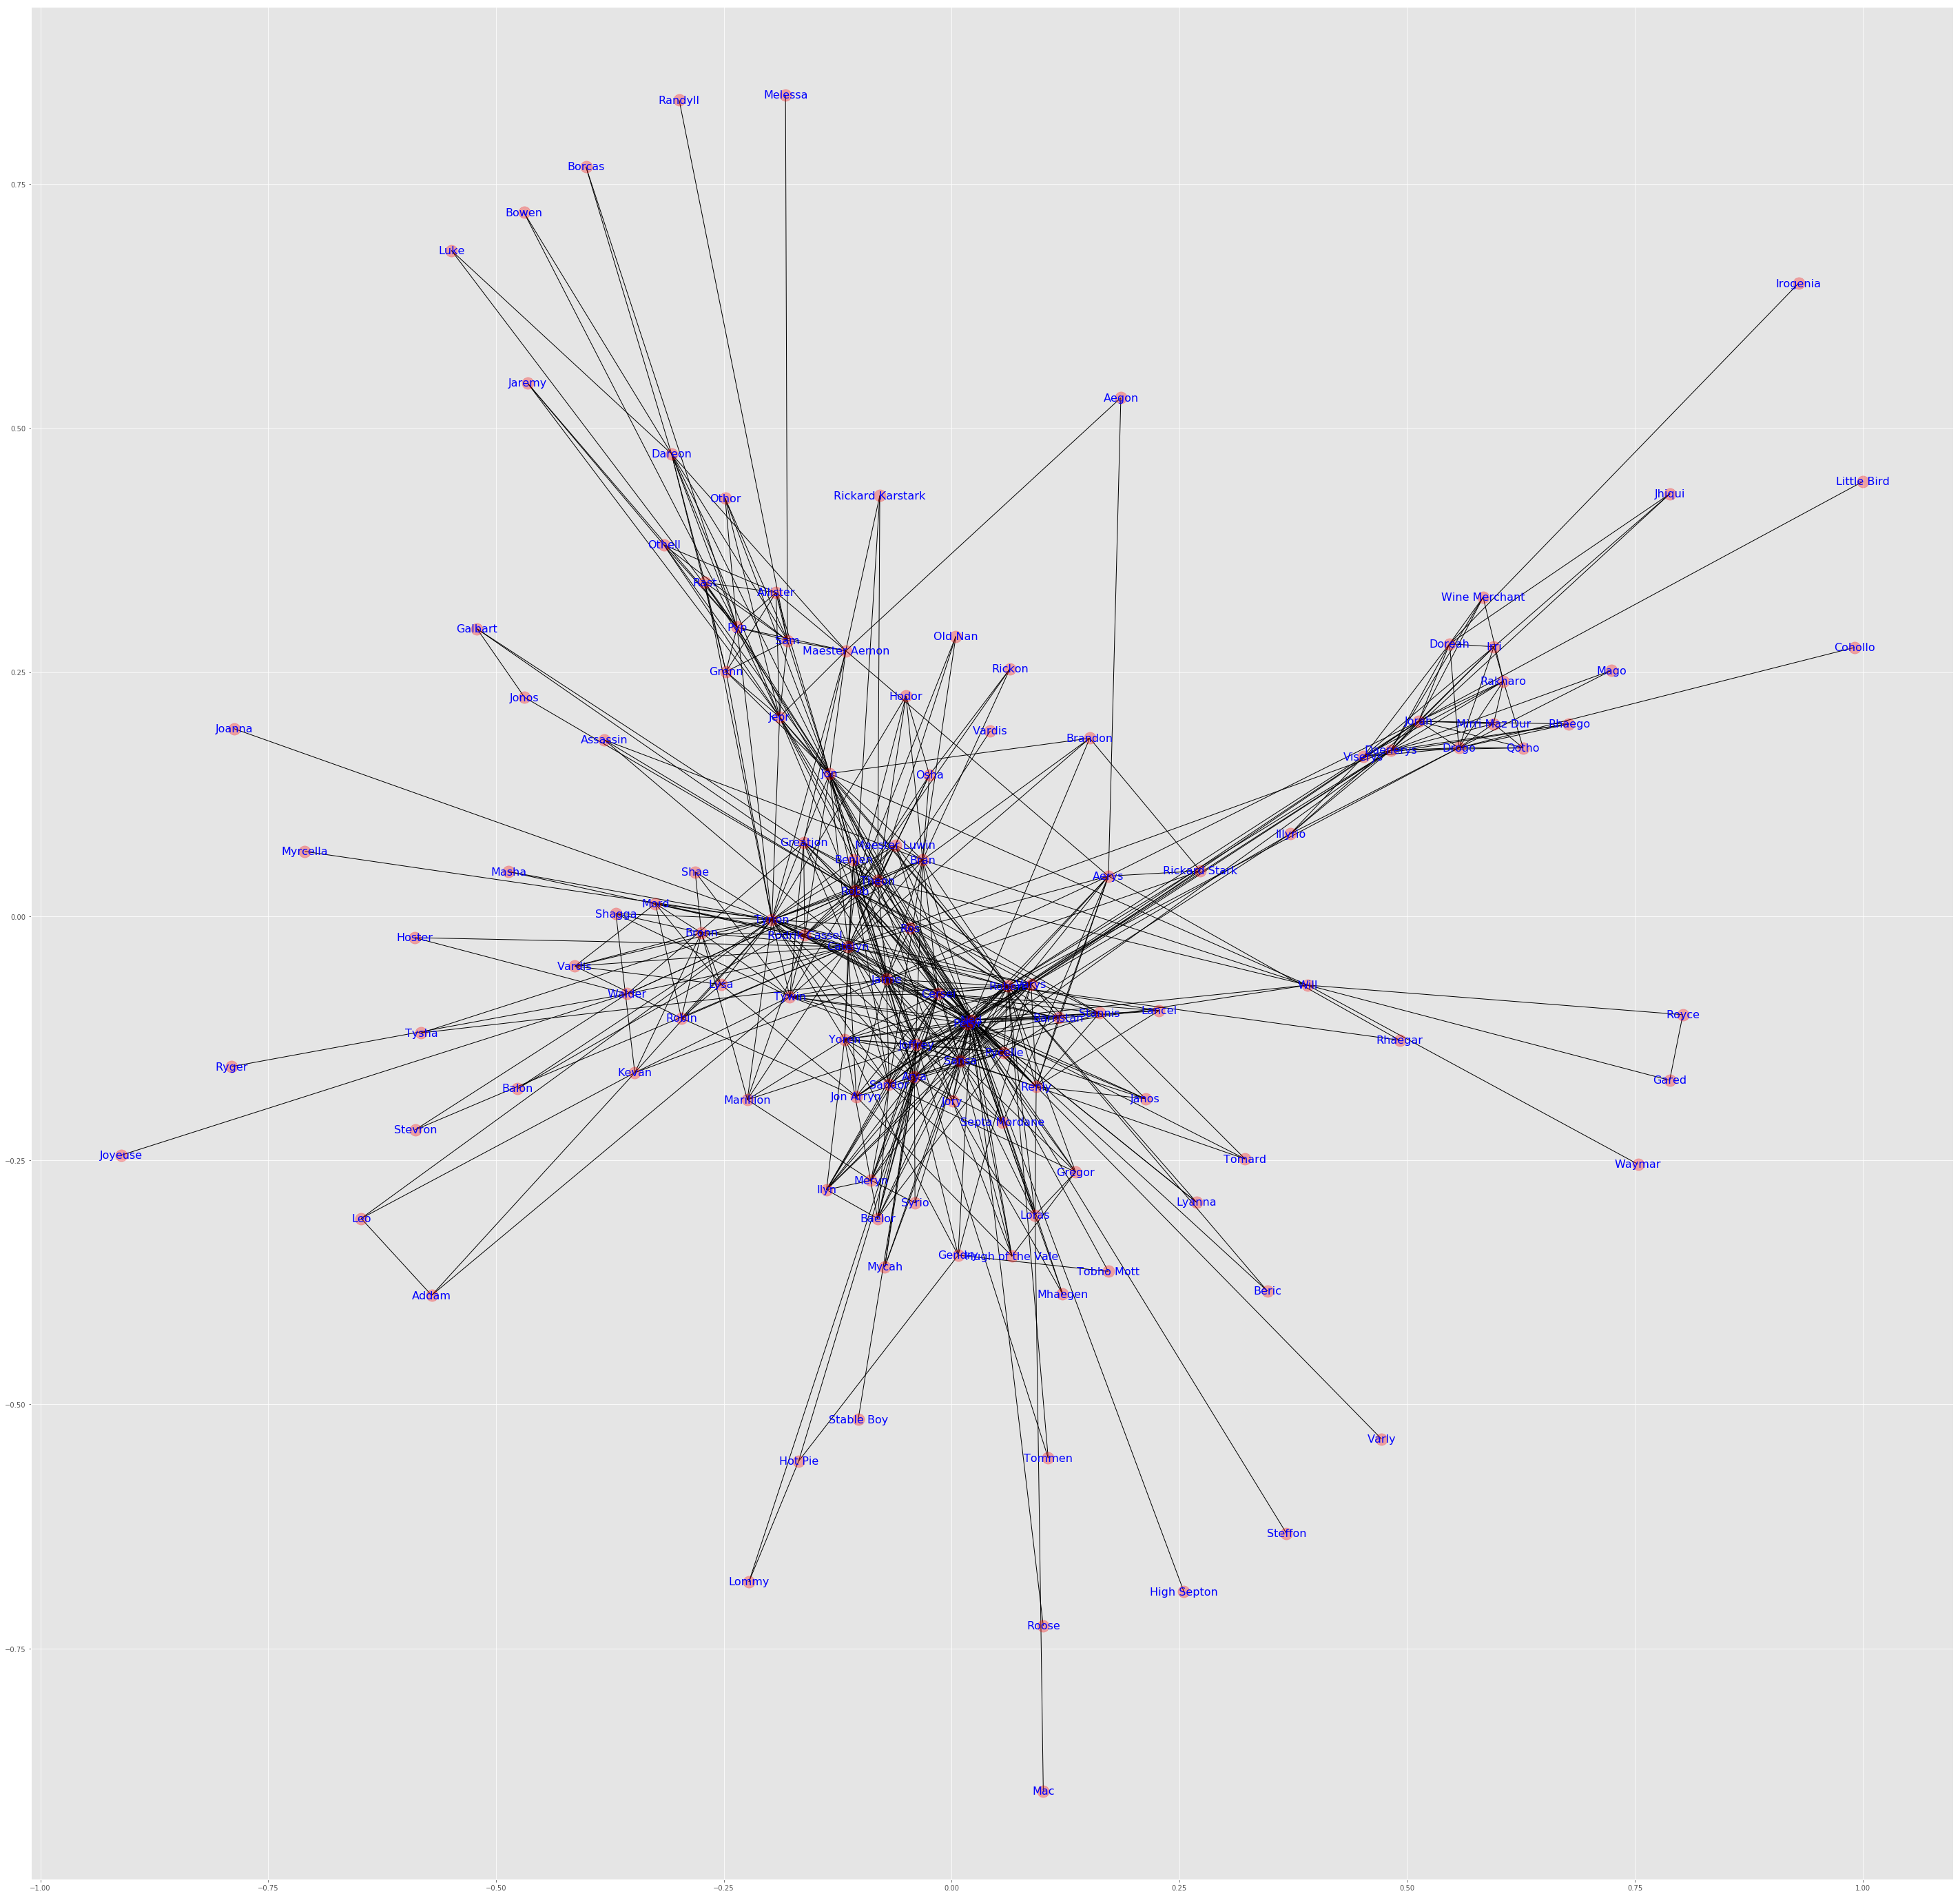

In [169]:
plt.figure(figsize=(50,50))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha = 0.3)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, label_dict, font_size=16, font_color = "blue")

C:\Users\Mathias N Tygesen\Miniconda3\envs\dtu\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


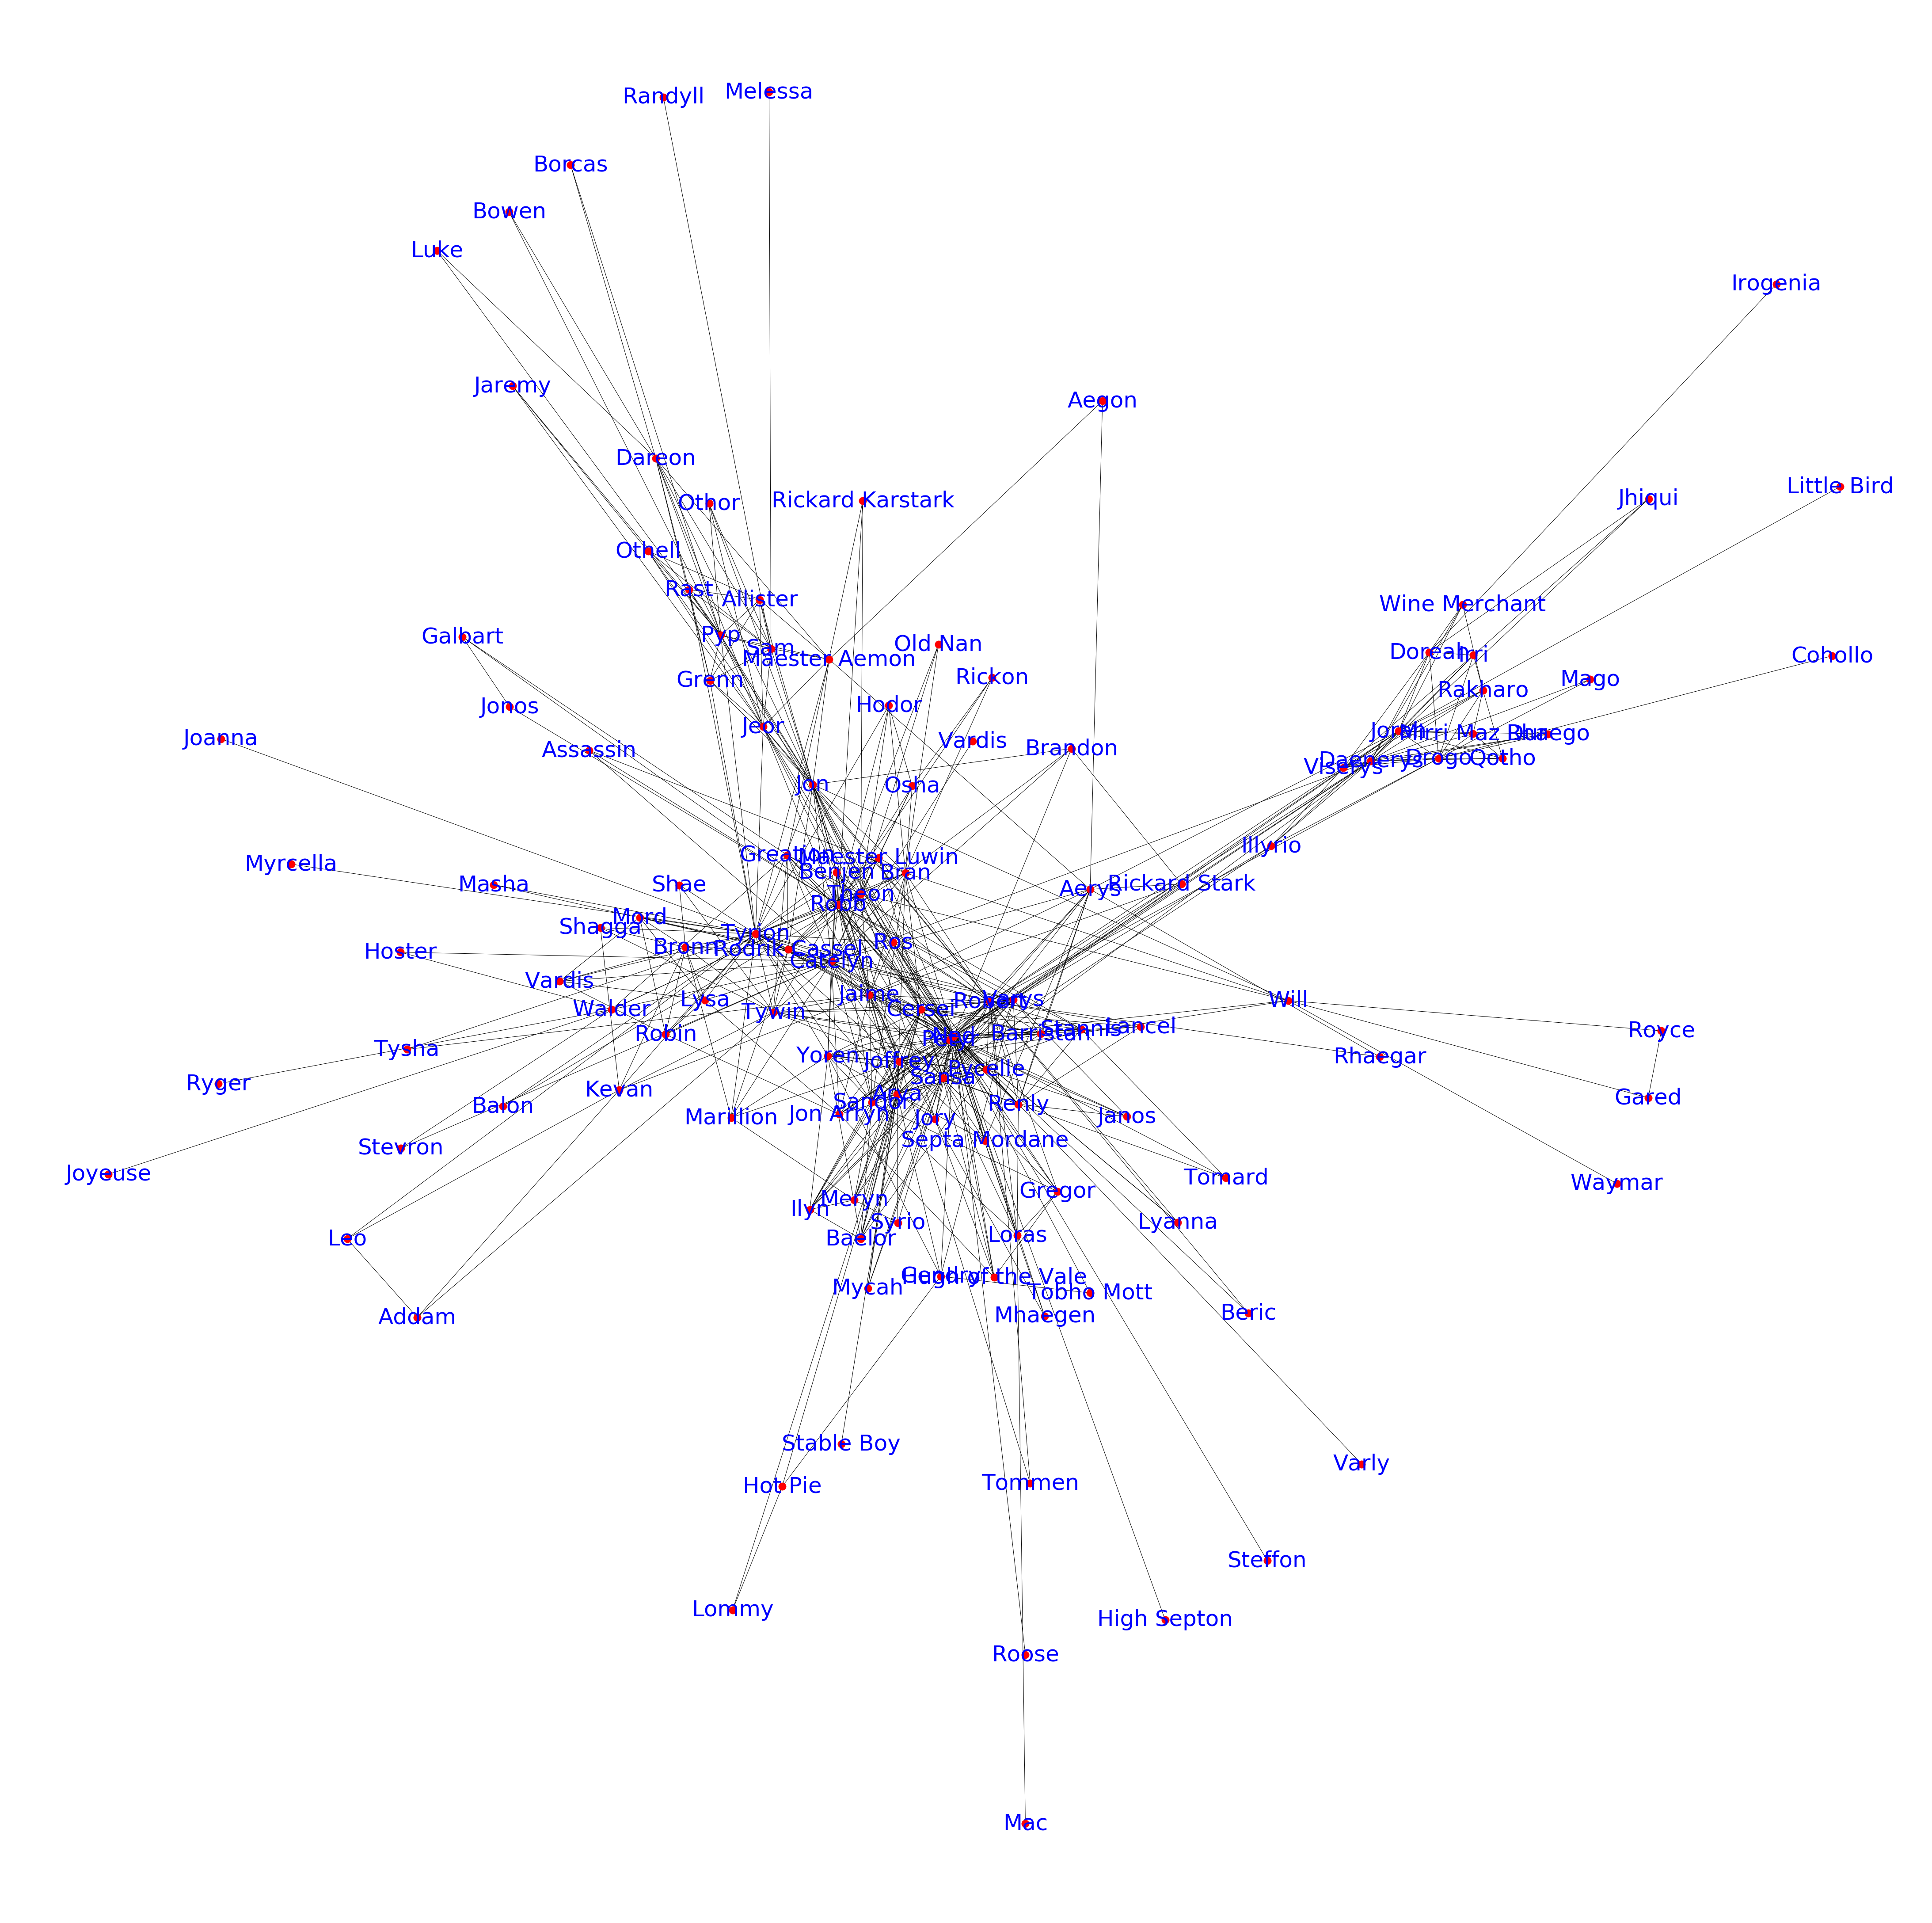

In [187]:
plt.figure(figsize=(60,60))
nx.draw(G,pos = pos, node_size=300)
nx.draw_networkx_labels(G, pos, label_dict, font_size=50, font_color = "blue")
plt.savefig('fig1.png')

In [188]:
pos = nx.spring_layout(G)

In [189]:
pos

{'ADDAM_MARBRAND': array([-0.27409279,  0.45473974]),
 'AEGON': array([-0.15382174, -0.29976935]),
 'AERYS': array([-0.02839421, -0.20232376]),
 'ALLISER_THORNE': array([0.13347302, 0.34022942]),
 'ARYA': array([ 0.17972968, -0.04225169]),
 'ASSASSIN': array([0.38648488, 0.13378625]),
 'BAELOR': array([ 0.2644907, -0.1139105]),
 'BALON': array([-0.17116962, -0.13141872]),
 'BARRISTAN': array([ 0.03265788, -0.15901801]),
 'BENJEN': array([0.08837815, 0.10971802]),
 'BERIC': array([ 0.16277266, -0.44518435]),
 'BORCAS': array([0.31589671, 0.73723001]),
 'BOWEN_MARSH': array([0.45070871, 0.65713266]),
 'BRAN': array([0.13967582, 0.07167835]),
 'BRANDON_STARK': array([ 0.35714304, -0.00694197]),
 'BRONN': array([-0.04899718,  0.15795238]),
 'CATELYN': array([0.02093848, 0.02824936]),
 'CERSEI': array([ 0.06094865, -0.03958211]),
 'COHOLLO': array([-0.82233121, -0.33006288]),
 'DAENERYS': array([-0.41623396, -0.12389348]),
 'DAREON': array([0.23444326, 0.46114104]),
 'DOREAH': array([-0.522